In [1]:
! pip install bnlp_toolkit
! pip install banglanltk
! pip install inltk
! pip install bnltk

In [2]:
! pip install transformers

In [3]:
! pip install python-Levenshtein

In [4]:
import torch

In [5]:
from bs4 import BeautifulSoup
import re 

from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer

import banglanltk as bn
from transformers import DistilBertTokenizer, TFDistilBertModel
from matplotlib import font_manager


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re 
from wordcloud import WordCloud
import string

from wordcloud import WordCloud
import matplotlib.pylab as plt
from PIL import Image, ImageTk
from wordcloud.wordcloud import STOPWORDS
stopwords=set(STOPWORDS)
from collections import Counter
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.layers import Embedding,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import torch
from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel
from bnlp.corpus import stopwords, punctuations, letters, digits
from sklearn.metrics import accuracy_score

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout, Input
from tqdm import tqdm
import pickle
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
import itertools
from sklearn.utils import shuffle
from tensorflow.keras import regularizers


from transformers import DistilBertTokenizer, DistilBertForMaskedLM
import seaborn as sn
from tensorflow.keras.layers import Dense, GRU, Embedding

In [8]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)
from nltk.tokenize import word_tokenize
from nltk import FreqDist

In [9]:
bangla_font_path="../input/bangla-fake-news-detection-dataset/Ador Noirrit Web.otf"
wordcloud_mask=np.array(Image.open("../input/bangla-fake-news-detection-dataset/twitter.png"))

In [10]:
df=pd.read_csv("https://media.githubusercontent.com/media/jarif87/multi-language-fake-news/master/final_bn_data.csv")

In [11]:
df.head()

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0


In [12]:
df["category"].value_counts()

National         5321
International    1898
Sports           1858
Miscellaneous    1236
Editorial        1021
Politics          879
Entertainment     788
Lifestyle         342
Crime             335
Education         308
Finance           300
Technology        251
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

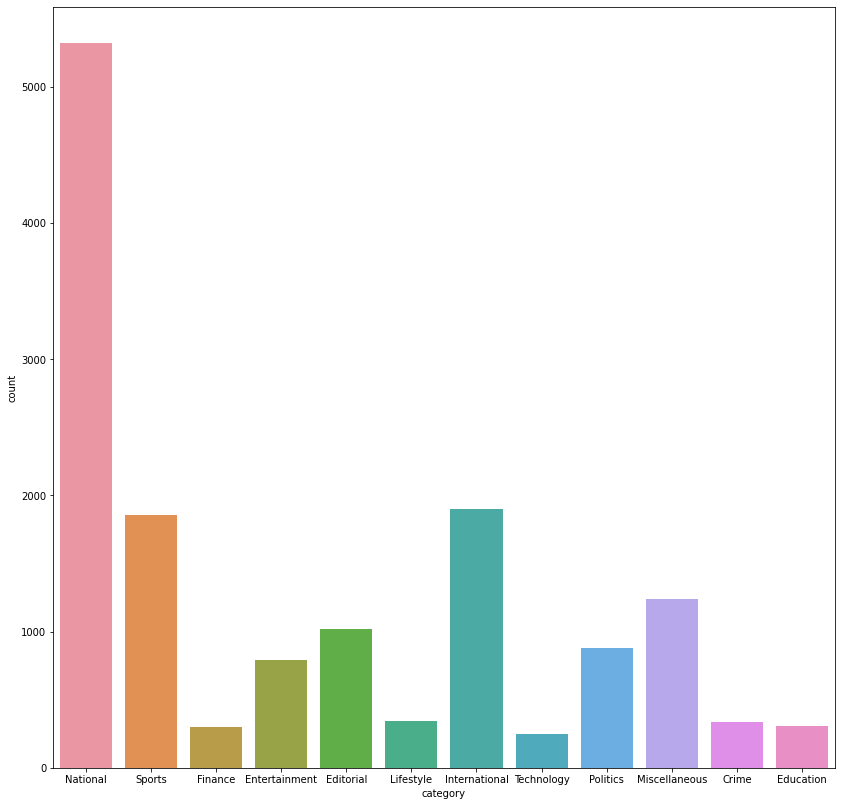

In [13]:
plt.figure(figsize=(14,14))

sns.countplot(x="category",data=df)

Bangla stopwords,punctuations,letters,digits

In [14]:
from bnlp.corpus import stopwords, punctuations, letters, digits
print(stopwords)
print(punctuations)
print(letters)
print(digits)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [15]:
df1 = df.loc[df['label']==0]
df2 = df.loc[df['label']==1]
df3=df2.sample(10000,replace=True)
df4=df1.sample(10000,replace=True)

In [16]:
frames = [df3,df4]
result = pd.concat(frames)
#df = result.reindex()
bangla_data= result.sample(frac=1).reset_index(drop=True)
bangla_data['label'].astype(int).value_counts()

1    10000
0    10000
Name: label, dtype: int64

In [17]:
real_bangla = bangla_data[bangla_data['label'].astype(int) == 1]
fake_bangla = bangla_data[bangla_data['label'].astype(int) == 0]
real_bangla = real_bangla.sample(frac=1).reset_index(drop=True)
fake_bangla= fake_bangla.sample(frac=1).reset_index(drop=True)

Fake Bangla Data Wordcloud

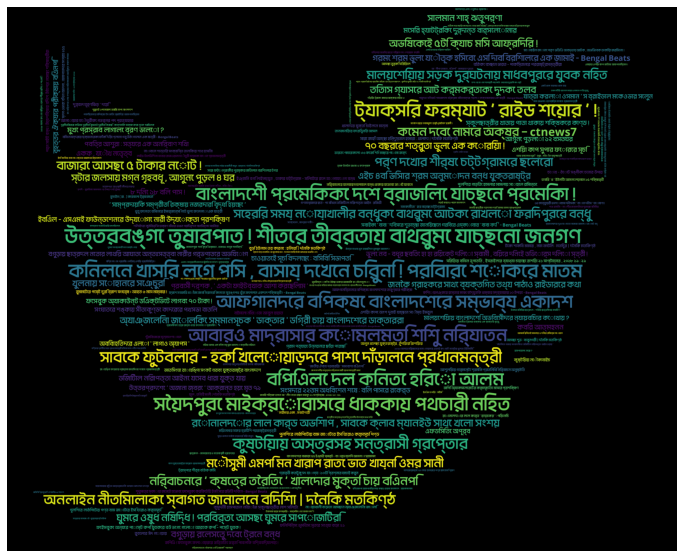

In [18]:
corpus = []
for i in range(0, len(fake_bangla)):
    review = re.sub(letters, ' ', (fake_bangla["headline"][i]))
    review = remove_stopwords(review, stopwords)
    review = ' '.join(review)
    corpus.append(review)
    
word_cloud_dict=Counter(corpus)
wordcloud = WordCloud(font_path=bangla_font_path,width = 1600, height = 800,mask=wordcloud_mask,background_color="black").generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud)

Real Bangla Data  Wordcloud

In [19]:
corpus = []
for i in range(0, len(real_bangla)):
    review = re.sub(letters, ' ', (real_bangla["headline"][i]))
    review = remove_stopwords(review, stopwords)
    review = ' '.join(review)
    corpus.append(review)

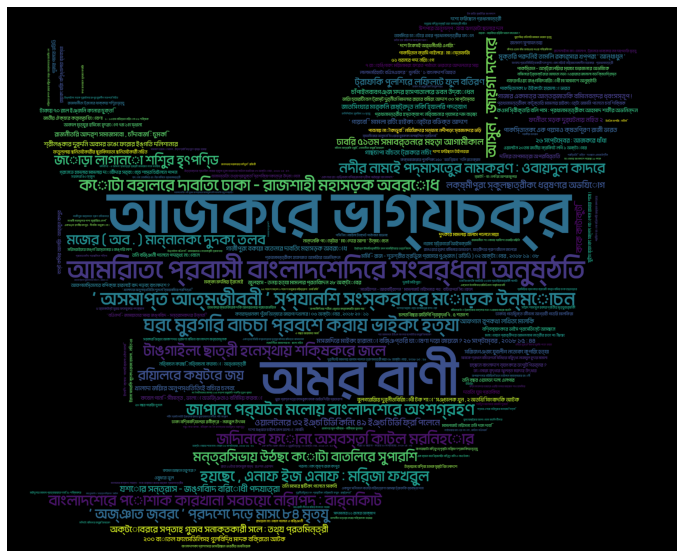

In [20]:
word_cloud_dict=Counter(corpus)
wordcloud = WordCloud(font_path=bangla_font_path,width = 1600, height = 800,mask=wordcloud_mask,background_color="black").generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud)

In [21]:
real_bangla["text"] =real_bangla["headline"]+" | "+ real_bangla["content"]
fake_bangla["text"] =fake_bangla["headline"]+" | "+ fake_bangla["content"]

In [22]:
real_bangla=real_bangla[["text","label"]]
fake_bangla=fake_bangla[["text","label"]]

In [23]:
real_bangla.head()

,text,label
0,কিশোরগঞ্জে সিএনজি অটোরিকশা উল্টে শিক্ষক নিহত |...,1.0
1,শাড়ি পরলে সুযোগ পাবেন সানি... | বলিউডে প্রতিষ্...,1.0
2,সুযোগ পাচ্ছেন আশরাফুল | শাস্তি ভোগের পর আশরাফু...,1.0
3,জাতীয় চাঁদ দেখা কমিটির সভা বুধবার | আগামীকাল ব...,1.0
4,‘জাতীয় ঐক্যের দুটি বিষয় আমাকে অবাক করেছে’ | ড....,1.0



দশটি সবচেয়ে ঘন ঘন শব্দ বাস্তব পাঠ্য

In [24]:
font_manager.fontManager.addfont(bangla_font_path)
prop = font_manager.FontProperties(fname=bangla_font_path)

In [25]:
corpus = []
for i in range(0, len(real_bangla)):
    review = real_bangla["text"].iloc[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

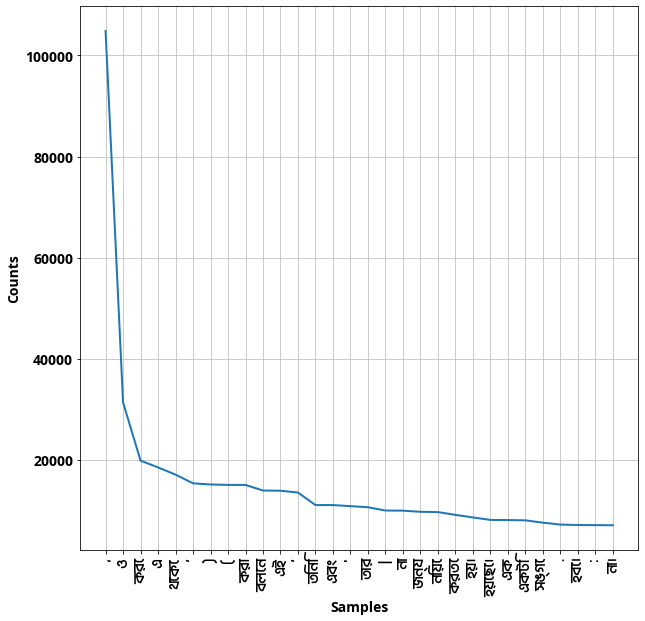

In [26]:
plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Li Ador Noirrit'
plt.rcParams['font.sans-serif'] = prop.get_name()

plt.rcParams.update({'font.size': 20})
tokenized_word=word_tokenize(str(corpus))
fdist = FreqDist(tokenized_word)
fdist.plot(30,cumulative=False)
plt.show()

দশটি সবচেয়ে ঘন ঘন শব্দ নকল পাঠ্য

In [27]:
font_manager.fontManager.addfont(bangla_font_path)
prop = font_manager.FontProperties(fname=bangla_font_path)

In [28]:
corpus = []
for i in range(0, len(fake_bangla)):
    review = fake_bangla["text"].iloc[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

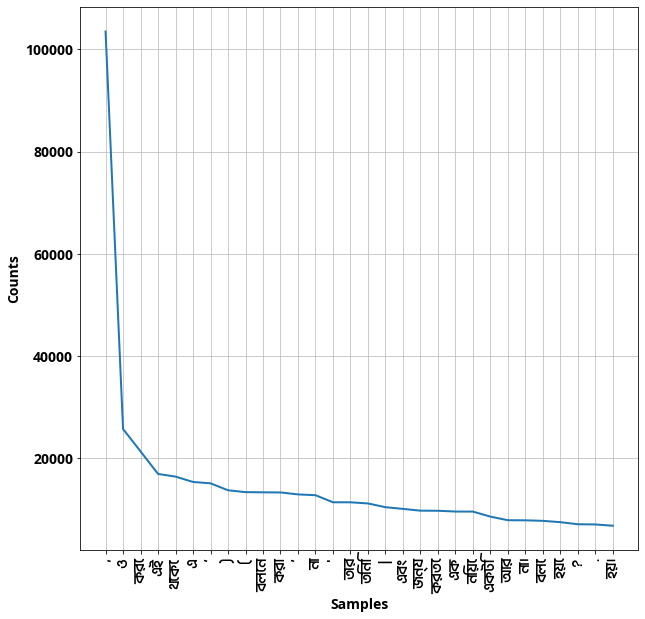

In [29]:
plt.rcParams['font.family'] = 'Li Ador Noirrit'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
tokenized_word=word_tokenize(str(corpus))
fdist = FreqDist(tokenized_word)
fdist.plot(30,cumulative=False)
plt.show()

In [30]:
bangla_data=real_bangla.append(fake_bangla,ignore_index=True)

In [31]:
bangla_data['label'] = bangla_data['label'].astype(int)

<AxesSubplot:xlabel='label', ylabel='count'>

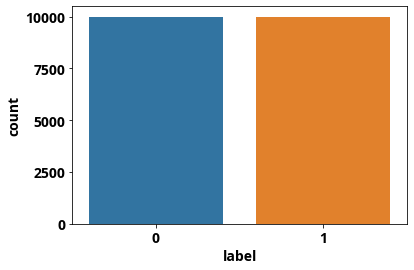

In [32]:
sns.countplot(bangla_data["label"])

In [33]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text
def remove_extra_whitespace_tabs(text):
   pattern = r'^\s*|\s\s*'
   return re.sub(pattern, ' ', text).strip()

In [34]:
def bn_lemmatization(text):

    #text1 = bn.stemmer(text)
    return bn.stemmer(text)

In [35]:

def remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
        
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)

Cleaning Bangla data

In [36]:
def cleaning(text):
    # text = remove_html_tags(text)
    # #text = remove_bn_stopwords(text)
    # text = remove_punctuation(text)
    # text = remove_extra_whitespace_tabs(text)
    # #text = bn_lemmatization(text)
    return text

In [37]:
# bangla_data["text"]=bangla_data['text'].apply(cleaning)

In [38]:
bangla_data.head()

,text,label
0,কিশোরগঞ্জে সিএনজি অটোরিকশা উল্টে শিক্ষক নিহত |...,1
1,শাড়ি পরলে সুযোগ পাবেন সানি... | বলিউডে প্রতিষ্...,1
2,সুযোগ পাচ্ছেন আশরাফুল | শাস্তি ভোগের পর আশরাফু...,1
3,জাতীয় চাঁদ দেখা কমিটির সভা বুধবার | আগামীকাল ব...,1
4,‘জাতীয় ঐক্যের দুটি বিষয় আমাকে অবাক করেছে’ | ড....,1


In [39]:
num_classes=len(bangla_data.label.unique())

In [40]:
bangla_data.head()

,text,label
0,কিশোরগঞ্জে সিএনজি অটোরিকশা উল্টে শিক্ষক নিহত |...,1
1,শাড়ি পরলে সুযোগ পাবেন সানি... | বলিউডে প্রতিষ্...,1
2,সুযোগ পাচ্ছেন আশরাফুল | শাস্তি ভোগের পর আশরাফু...,1
3,জাতীয় চাঁদ দেখা কমিটির সভা বুধবার | আগামীকাল ব...,1
4,‘জাতীয় ঐক্যের দুটি বিষয় আমাকে অবাক করেছে’ | ড....,1


In [41]:
distil_bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [42]:
distil_bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

2022-10-15 20:37:22.148152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 20:37:22.149282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 20:37:22.149989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 20:37:22.150843: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [43]:
max_len=40
sentences=bangla_data["text"]
labels=bangla_data["label"]
len(sentences),len(labels)

(20000, 20000)

In [44]:
distil_bert_input=distil_bert_tokenizer.encode_plus(sentences[0],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)


In [45]:
distil_bert_input

{'input_ids': [101, 100, 1376, 29915, 29887, 29902, 29894, 29915, 1347, 29895, 29917, 29914, 29908, 29915, 29889, 29910, 29914, 1350, 29909, 29895, 29917, 1374, 29915, 29889, 29911, 29889, 1366, 29915, 29913, 29898, 1064, 100, 1376, 29915, 29887, 29902, 29894, 29915, 1347, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [46]:
distil_bert_input['input_ids']

[101,
 100,
 1376,
 29915,
 29887,
 29902,
 29894,
 29915,
 1347,
 29895,
 29917,
 29914,
 29908,
 29915,
 29889,
 29910,
 29914,
 1350,
 29909,
 29895,
 29917,
 1374,
 29915,
 29889,
 29911,
 29889,
 1366,
 29915,
 29913,
 29898,
 1064,
 100,
 1376,
 29915,
 29887,
 29902,
 29894,
 29915,
 1347,
 102]

In [47]:
input_id=np.asarray(distil_bert_input['input_ids'])
input_mask=np.asarray(distil_bert_input['attention_mask'])
out_put=distil_bert_model([input_id.reshape(1,-1),input_mask.reshape(1,-1)])
type(out_put)

transformers.modeling_tf_outputs.TFBaseModelOutput

In [48]:
out_put

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 40, 768), dtype=float32, numpy=
array([[[-0.10240124, -0.23045857, -0.3817529 , ..., -0.24162671,
          0.78155965, -0.09783925],
        [-0.09736921, -0.3611771 , -0.37296677, ...,  0.02911894,
          0.6338564 , -0.550826  ],
        [-0.17052162, -0.10219839,  0.03929244, ..., -0.40365025,
          0.49584195, -0.57538044],
        ...,
        [ 0.45767617, -0.34026763, -0.04265688, ..., -0.38827482,
          0.5082225 , -0.73450196],
        [ 0.42499742, -0.45185396, -0.07775186, ..., -0.10951811,
          0.29278088, -0.630357  ],
        [ 0.7161873 ,  0.01691463, -0.5523946 , ..., -0.02405316,
         -0.3800523 , -0.44934118]]], dtype=float32)>, hidden_states=None, attentions=None)

In [49]:
distil_bert_tokenizer.decode(distil_bert_input['input_ids'])

'[CLS] [UNK] সিএনজি অটোরিকশা উলটে শিকষক নিহত | [UNK] সিএনজি অ [SEP]'

In [50]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    distil_bert_input_shape=distil_bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids.append(distil_bert_input_shape['input_ids'])
    attention_masks.append(distil_bert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [51]:
len(input_ids),len(attention_masks),len(labels)

(20000, 20000, 20000)

In [52]:
print('Input shape {} \nAttention mask shape {} \nInput label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Input shape (20000, 40) 
Attention mask shape (20000, 40) 
Input label shape (20000,)


In [53]:

X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.3,random_state=42,shuffle=True)

In [54]:


print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))




Train input shape (14000, 40)
Test input shape (6000, 40)
Train label shape (14000,)
Test label shape (6000,)
Train attention mask shape (14000, 40)
Test attention mask shape (6000, 40)


Create Distilbert Model With GRU Layer

In [55]:
def create_model():
    input_shape = Input(shape = (max_len,), dtype='int32')
    masks= Input(shape = (max_len,), dtype='int32')
    distil_bert_layer = distil_bert_model(input_ids=input_shape, attention_mask=masks)[0]
    X = (tf.keras.layers.GRU(128, return_sequences=True))(distil_bert_layer)
    X = tf.keras.layers.GlobalMaxPool1D()(X)
    X=(tf.keras.layers.Dense(64,activation="tanh"))(X)
    X=(tf.keras.layers.Dense(32))(X)


    X = tf.keras.layers.Dense(16)(X)

    X = tf.keras.layers.Dense(8)(X)
    
    X = tf.keras.layers.Dense(4)(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    X = tf.keras.layers.Dense(num_classes, activation='softmax')(X)
    model = tf.keras.Model(inputs=[input_shape,masks], outputs=X)
   
   
        

    
    print(model.summary())
    return model    

In [56]:
model=create_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
gru (GRU)                       (None, 40, 128)      344832      tf_distil_bert_model[0][0]   

In [57]:

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss,optimizer=optimizer, metrics=[metric])

In [58]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=10,epochs=10,validation_data=([X_test_input,test_mask],Y_test_label))

Epoch 1/10


2022-10-15 20:41:39.285396: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


   1/1400 [..............................] - ETA: 2:04:27 - loss: 1.1704 - accuracy: 0.3000

2022-10-15 20:41:44.460067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1400/1400 [==============================] - 70s 47ms/step - loss: 0.7016 - accuracy: 0.5186 - val_loss: 0.6934 - val_accuracy: 0.5160
Epoch 2/10
1400/1400 [==============================] - 68s 48ms/step - loss: 0.6855 - accuracy: 0.5484 - val_loss: 0.6712 - val_accuracy: 0.5767
Epoch 3/10
1400/1400 [==============================] - 64s 46ms/step - loss: 0.6747 - accuracy: 0.5723 - val_loss: 0.6513 - val_accuracy: 0.6085
Epoch 4/10
1400/1400 [==============================] - 68s 48ms/step - loss: 0.6517 - accuracy: 0.6064 - val_loss: 0.6317 - val_accuracy: 0.6392
Epoch 5/10
1400/1400 [==============================] - 68s 48ms/step - loss: 0.6193 - accuracy: 0.6459 - val_loss: 0.6345 - val_accuracy: 0.6262
Epoch 6/10
1400/1400 [==============================] - 68s 48ms/step - loss: 0.5743 - accuracy: 0.6961 - val_loss: 0.5670 - val_accuracy: 0.7063
Epoch 7/10
1400/1400 [==============================] - 64s 46ms/step - loss: 0.5164 - accuracy: 0.7436 - val_loss: 0.5257 - val_accura

Accuracy Graph

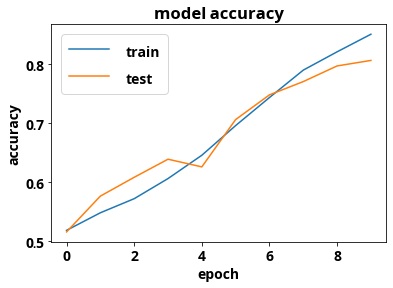

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss Graph

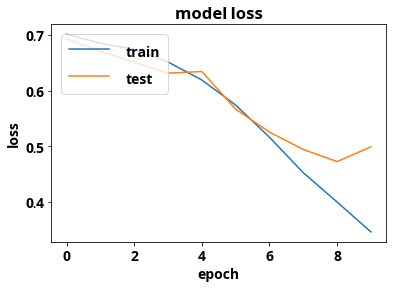

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
prediction= model.predict([X_test_input,test_mask],batch_size=10)
pred_labels = prediction.argmax(axis=1)
accuracy_score(Y_test_label,pred_labels)


0.8065

Confusion Matrix

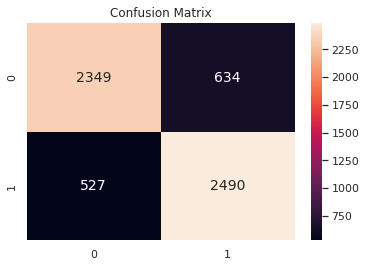

In [62]:
cm=confusion_matrix(Y_test_label, pred_labels)
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
                     

Classification Report

In [63]:
print('Classification Report\n')
print(classification_report(Y_test_label,pred_labels))

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2983
           1       0.80      0.83      0.81      3017

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.81      0.81      0.81      6000



Custom Data Prediction System

In [64]:
x=["নড়াইল থেকে ফিরে: গত ১০ অক্টোবর মধুমতী নদীর ওপর দেশের প্রথম ছয় লেনের মধুমতী সেতু উদ্বোধন করেন প্রধানমন্ত্রী শেখ হাসিনা। লোহাগড়া উপজেলার মধুমতী নদীর অংশে এ সেতু নির্মাণে কমেছে যশোর-নড়াইলের দূরত্ব"]

In [65]:
test_input=distil_bert_tokenizer.encode_plus(x,add_special_tokens = True,max_length =100,pad_to_max_length = True,truncation=True)


In [66]:
test_input_id=np.asarray(test_input['input_ids'])
test_input_mask=np.asarray(test_input['attention_mask'])
# out_put=model([test_input_id.reshape(1,-1),test_input_mask.reshape(1,-1)])

In [67]:
prediction=model.predict([test_input_id,test_input_mask],batch_size=10)
test_pred_label=prediction.argmax(axis=1)[0]

In [68]:
if test_pred_label==0:
    print("News is Fake")
else:
    print("News is Real")

News is Real
